In [217]:
## Relevant Imports
import pandas as pd
from datetime import datetime
import matplotlib.pyplot as plt

## Plot Styling
plt.style.use('seaborn-white')
plt.rcParams.update({'axes.titlesize': 'large'})
plt.rcParams.update({'axes.labelsize': 'large'})

In [218]:
## Loading Data
df = pd.read_csv('data_vis_test.csv')

## Pre-Processing
# Replacing blanks with NA
df.replace('', 'NA', inplace=True)
# Coverting columns to appropriate datatype
df['first_open_timestamp_micros'] = pd.to_datetime(df['first_open_timestamp_micros'], unit='us')

df.head()

,user_id,first_open_timestamp_micros,mobile_brand_name,device_model
0,59742df346ab8ae80d7320e5,2017-10-29 05:52:28.059,Samsung,SM-J200G
1,59d23b4cb2cb0511457c3718,2017-10-02 13:16:23.309,Xiaomi,Redmi 4A
2,59c8671a625fbbd425d735ae,2017-09-25 02:15:02.698,NaN,Swipe_Elite_3
3,591ff88228d8f8c86bfd75bf,2017-10-01 06:32:04.046,OPPO,A37f
4,59feaccfa3c446c82ca3e68c,2017-11-05 06:12:17.239,Sony,C6902


Observations - 
- Blank values are replaced by NaN and invalid 'time since epoch' values are replaced by NaT. 
- The timestamps are available with micro-second granularity. 
- User_id column comprises of random strings which do not provide any specific information about the user.

In [219]:
##Column Cardinalities
df.apply(pd.Series.nunique)

user_id                        9974
first_open_timestamp_micros    9994
mobile_brand_name                69
device_model                    954
dtype: int64

Observations - 
- 'first_open_timestamp_micros' and 'user_id' are high cardinality columns.
- There is data from 69 brands in this dataset and around ~1k different models.

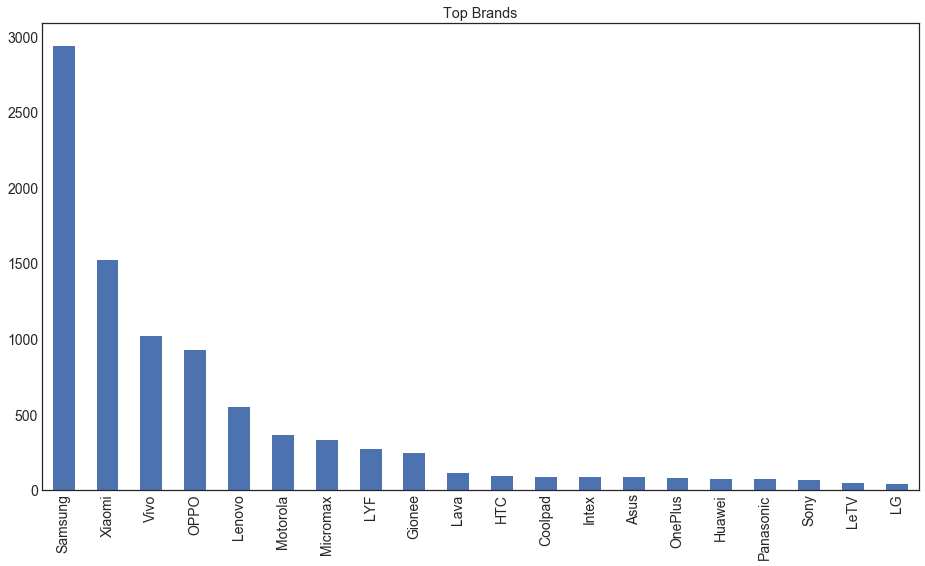

In [220]:
## Most Frequent Values for each column
top_brands = df['mobile_brand_name'].value_counts().head(20)
brands_plot = top_brands.plot(kind='bar', title ="Top Brands", figsize=(14,8), fontsize=14)
plt.show()

Observations -

- Samsung, Xiaomi, Vivo and OPPO are the most frequent brands in this dataset which are also the top-selling phone brands in India (confirming this data is collected from India phone users).
- The data shows a tail depicting power law (80-20 rule) behaviour. 

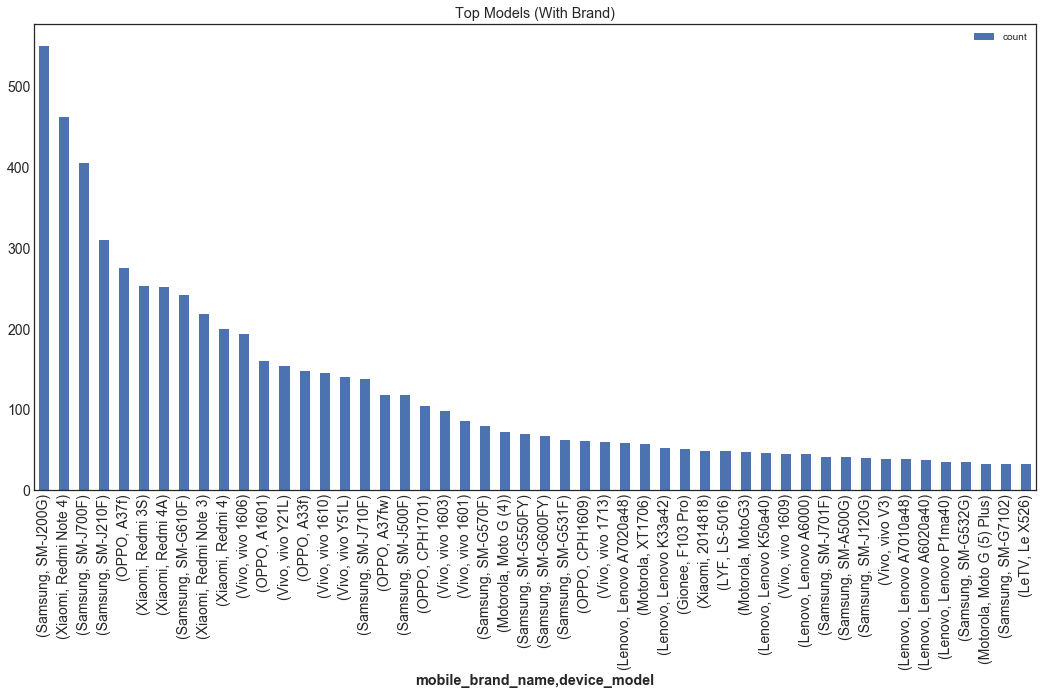

In [221]:
top_brand_model = input_data.groupby(['mobile_brand_name', 'device_model'])\
                ['user_id'].agg({"count": len}).sort_values("count", ascending=False).head(50)
top_brand_model.plot(kind='bar', title ="Top Models (With Brand)", figsize=(16,8), fontsize=14)
plt.show()

Observations -

- Samsung SM-J200G, Xiaomi Redmi Note 4 and Samsung SM-J700F are the most frequent phone models in the dataset.
- The tail is also evident from this plot but the distribution is less skewed as compared to the plot above.

In [222]:
df.groupby(df['first_open_timestamp_micros'].dt.year)['user_id'].agg({"count": len})\
    .sort_values("count", ascending=False)

,count
first_open_timestamp_micros,
2017.0,9992
2016.0,2
2014.0,1


Observation - There is negligible data from any other year except 2017.
Please note that the analysis below only includes data from the year 2017 for the same reason.

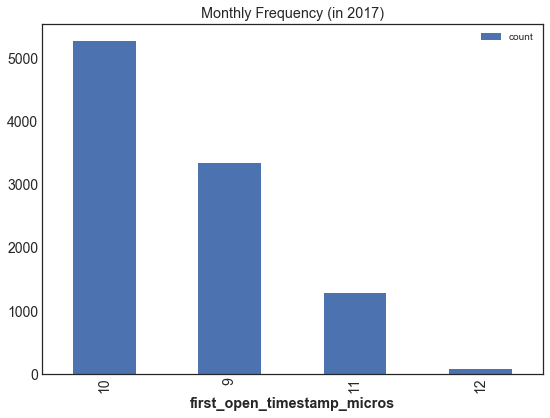

In [223]:
## Monthly Frequency 
df_2017 = df.loc[df['first_open_timestamp_micros'].dt.year == 2017]
monthly_frequency = df_2017.groupby(df_2017['first_open_timestamp_micros'].dt.month)['user_id']\
        .agg({"count": len}).sort_values("count", ascending=False)
monthly_frequency.plot(kind='bar', title ="Monthly Frequency (in 2017)", figsize=(8,6), fontsize=14)
plt.show()

Observations -

- There is only activity pertaining to months September (month 9), October (month 10), November (month 11) and December (month 12) i.e. the last quarter of the year with maximum activity during October.
- It is not clear whether there is no activity during other months or those records are just not a part of this dataset.

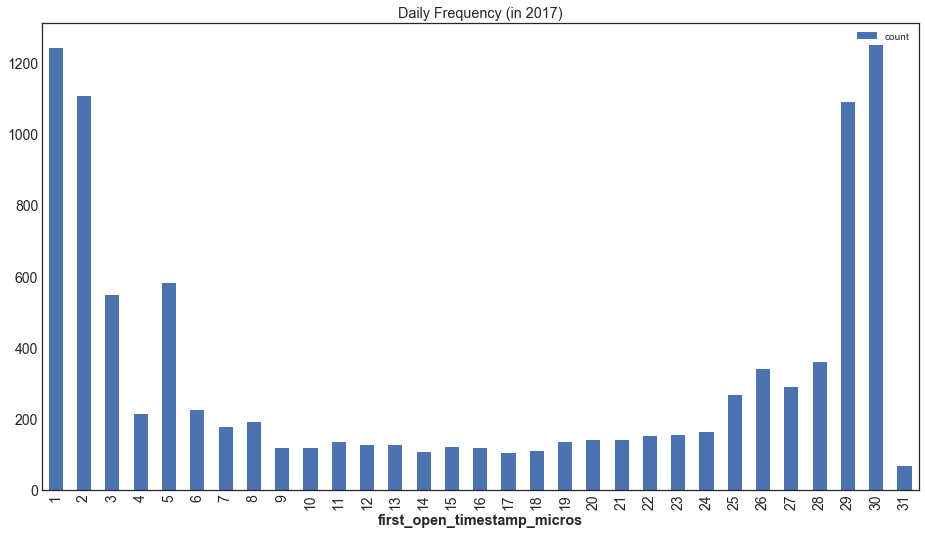

In [224]:
## Daily Frequency 
daily_frequency = df_2017.groupby(df_2017['first_open_timestamp_micros'].dt.day)['user_id']\
        .agg({"count": len})
daily_frequency.plot(kind='bar', title ="Daily Frequency (in 2017)", figsize=(14,8), fontsize=14)
plt.show()

Observations -

- Most of the first-time app use is during the last and the first few days of the month. This maybe attributed to a promotion, some phenomenon associated with the game leagues in the app or even financial availibility (in case the app is not free) as most people get salaries during this time.
- First-time usage is low and almost stable during the middle of the month.

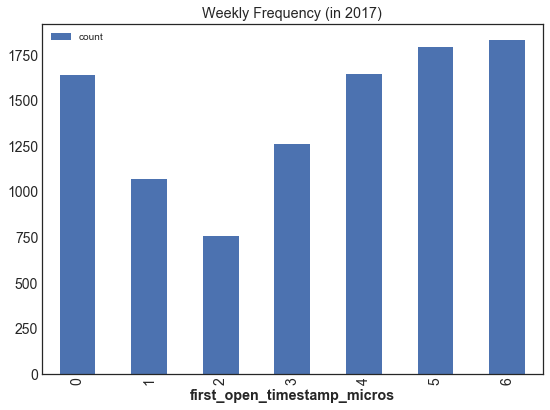

In [225]:
## Weekly Frequency 
weekly_frequency = df_2017.groupby(df_2017['first_open_timestamp_micros'].dt.dayofweek)['user_id']\
        .agg({"count": len})
weekly_frequency.plot(kind='bar', title ="Weekly Frequency (in 2017)", figsize=(8,6), fontsize=14)
plt.show()

Observation - Activity steadily increases as the weekend appraoches and is minimum for Monday and Tuesday. This maybe attributed to the fact that people spend less time on leisure activities like gaming early in the week when work usually takes most of the time.


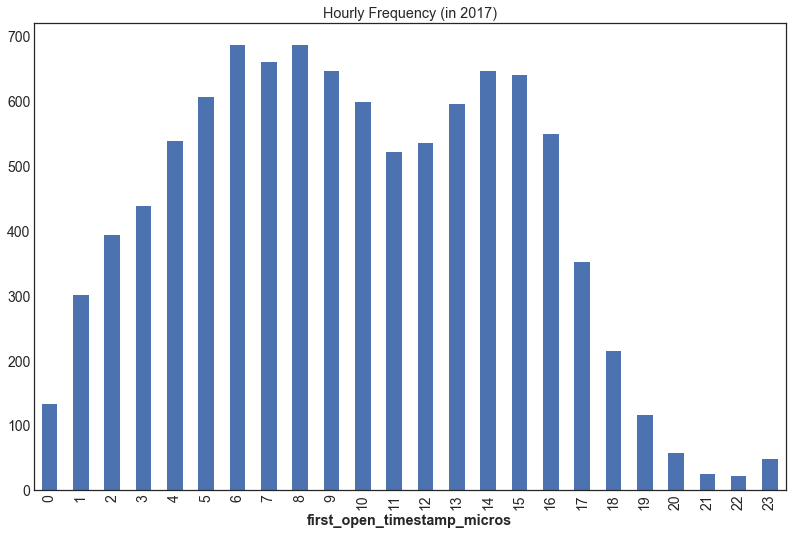

In [226]:
## Hourly Frequency 
hourly_frequency = df_2017.groupby([df_2017['first_open_timestamp_micros'].dt.hour])['user_id'].count()
hourly_frequency.plot(kind='bar', title ="Hourly Frequency (in 2017)", figsize=(12,8), fontsize=14)
plt.show()

Observations -

- The activity peaks almost twice during the day. 
- If the time given in the dataset is in IST, then these peaks are around early morning and late afternoon.
- There is atleast a period of 6 hrs with very low first-time app usage.


I also made some other likely to be relevant plots but they didn't have any interesting observations which could be deduced given the information in this dataset. I decided to not include them in this report for that reason.